In [1]:
import umap
import humap
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.utils import check_array
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# if you have low memory
X, _, y, _ = train_test_split(X, y, test_size=0.7, random_state=0)
X = normalize(X)
print(X.shape, y.shape)


(21000, 784) (21000,)


In [3]:
%%time
hUmap1 = humap.UMAP(knn_algorithm="NNDescent", reproducible=True)
embedding1 = hUmap1.fit_transform(X)

hUmap2 = humap.UMAP(knn_algorithm="NNDescent", reproducible=True)
embedding2 = hUmap2.fit_transform(X)

hUmap3 = humap.UMAP(knn_algorithm="NNDescent", reproducible=True)
embedding3 = hUmap3.fit_transform(X)


Sat Nov  5 09:26:09 2022 Building RP forest with 12 trees
Sat Nov  5 09:26:09 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Sat Nov  5 09:27:14 2022 Building RP forest with 12 trees
Sat Nov  5 09:27:15 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Sat Nov  5 09:28:10 2022 Building RP forest with 12 trees
Sat Nov  5 09:28:10 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Wall time: 3min


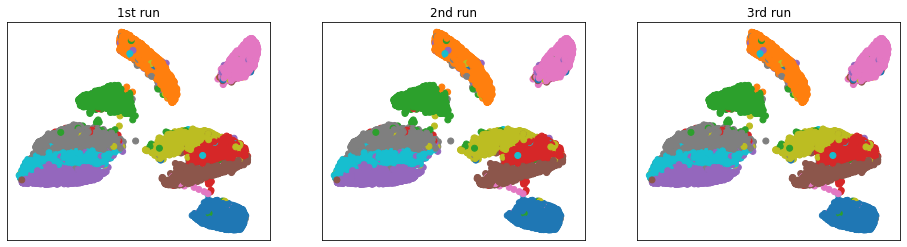

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))


axs[0].scatter(embedding1[:, 0], embedding1[:, 1], c=y.astype(int), alpha=1, cmap='tab10')
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[0].set_title('1st run')


axs[1].scatter(embedding2[:, 0], embedding2[:, 1], c=y.astype(int), alpha=1, cmap='tab10')
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[1].set_title('2nd run')

axs[2].scatter(embedding3[:, 0], embedding3[:, 1], c=y.astype(int), alpha=1, cmap='tab10')
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[2].set_title('3rd run')

# plt.savefig('rep.png', bbox_inches='tight')
plt.show()
